Intro: Demo of linear Gaussian system.

Inferring an unknown scalar from noisy measurement. cf. Kevin Murphy MLaPP Sec. 4.4.2

$
\begin{equation}
\begin{array}{r c l}
p(x) &=& \mathcal{N} (x | \mu_0, \sigma_0) \\
p(y | x) &=& \mathcal{N} (y | x, \sigma_y)
\end{array}
\end{equation}
$

$\Rightarrow$

$
\begin{equation}
p(\boldsymbol{x} | \boldsymbol{y}) = \mathcal{N} (\boldsymbol{x} \hspace{1pt}| \hspace{1pt} \boldsymbol{\mu_{x|y}, \sigma_{x|y}})
\end{equation}
$

$
\begin{equation}
\begin{array}{r c l}
\lambda_N &=& \lambda_0 + N \lambda_y \\
\mu_{x|y} &=& \dfrac{N \lambda_y}{\lambda_N} y + \dfrac{\lambda_0}{\lambda_N} \mu_0
\end{array}
\end{equation}
$

where 
$\lambda_0 = 1/\sigma_x^2$,$\hspace{3pt}$ $\lambda_y = 1/\sigma_y^2$, $\hspace{3pt}$ $\lambda_N = 1/\sigma^2_{x|y}$



In [2]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [9]:
def gaussian_inference(mu_0, Sigma_0, obs, Sigma_y):
    y_bar = np.mean(obs)
    N = len(obs)
    
    lambda_0 = 1.0/np.power(Sigma_0, 2.0)
    lambda_y = 1.0/np.power(Sigma_y, 2.0)    
    
    lambda_N = lambda_0 + N * lambda_y
    Sigma_N = np.sqrt(1.0/lambda_N)
    mu_N = y_bar * (N * lambda_y)/lambda_N + mu_0 * lambda_0/lambda_N   
    
    return mu_N, Sigma_N

In [10]:
priorSigmas = [np.sqrt(1.0), np.sqrt(5.0)]
mu_0 = 0.0
Sigma_y = 1.0
xvalues = np.arange(-5.0, 7.0, 0.125)

ys = np.array([3.0])
y_bar = np.mean(ys)


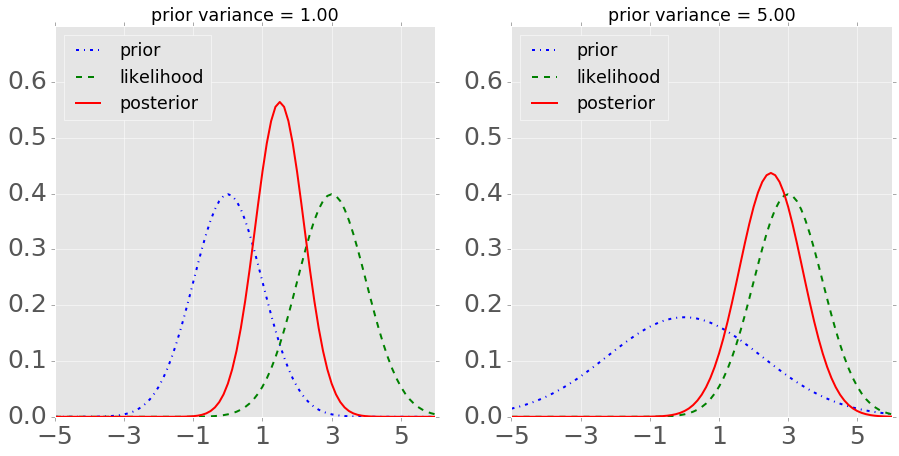

In [11]:
XMIN = -5.0  
XMAX = 6.0  
YMIN = 0.0
YMAX = 0.7

FONTSIZE = 25
plt.close('all')
fig = plt.figure(figsize=(15, 7))
gs = matplotlib.gridspec.GridSpec(1, 2, width_ratios=[1, 1])

for i, Sigma_0 in enumerate(priorSigmas):
    mu_N, Sigma_N = gaussian_inference(mu_0, Sigma_0, ys, Sigma_y)
    
    prior = scipy.stats.norm(loc=mu_0, scale=Sigma_0)
    likelihood = scipy.stats.norm(loc=y_bar, scale=Sigma_y) # fixed     
    posterior = scipy.stats.norm(loc=mu_N, scale=Sigma_N)
    
    ax = plt.subplot(gs[0, i])
   
    prior_plot, = ax.plot(xvalues, prior.pdf(xvalues), lw=2, linestyle='-.', color='b')
    likelihood_plot, = ax.plot(xvalues, likelihood.pdf(xvalues), lw=2, linestyle='--', color='g')
    posterior_plot, = ax.plot(xvalues, posterior.pdf(xvalues), lw=2, linestyle='-', color='r')

    ax.set_xlim(XMIN, XMAX)
    ax.set_ylim(YMIN, YMAX)
    ax.xaxis.set_ticks(np.arange(XMIN, XMAX, 2))
    ax.yaxis.set_ticks(np.arange(YMIN, YMAX, 0.1))
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(FONTSIZE) 
        tick.label.set_rotation(0)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(FONTSIZE) 
        tick.label.set_rotation(0)   
    ax.set_title('prior variance = {0:.2f}'.format(np.power(Sigma_0, 2.0)), fontsize=FONTSIZE*0.7)
    l = plt.legend((prior_plot, likelihood_plot, posterior_plot), 
                   ('prior', 'likelihood', 'posterior'), 
                   fontsize=FONTSIZE*0.7, loc=2)    
    